# Home Brew Craft Beer

[jtrofe] provided a dataset of 75,000 homebrewed beers with over 176 different styles. 

Beer records are user-reported and are classified according to one of the 176 different styles. These recipes go into as much or as little detail as the user provided, but there's are least 5 useful columns where data was entered for each: Original Gravity, Final Gravity, ABV, IBU, and Color

The user-submitted beer recipes was scraped from [Brewer's Friend]. All columns standardized except "Priming Method" and "Priming Amount", which seems like it just let the users write whatever they wanted.

[jtrofe]:(https://www.kaggle.com/jtrofe)
[Brewer's Friend]:(https://www.brewersfriend.com/search/)

In [1]:
import numpy as np
import pandas as pd
#from dateutil.parser import parse
#from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
recipe = pd.read_csv('Data/recipeData.csv',encoding='latin1')

## What does the data look like?

In [3]:
recipe.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [4]:
recipe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
BeerID           73861 non-null int64
Name             73860 non-null object
URL              73861 non-null object
Style            73265 non-null object
StyleID          73861 non-null int64
Size(L)          73861 non-null float64
OG               73861 non-null float64
FG               73861 non-null float64
ABV              73861 non-null float64
IBU              73861 non-null float64
Color            73861 non-null float64
BoilSize         73861 non-null float64
BoilTime         73861 non-null int64
BoilGravity      70871 non-null float64
Efficiency       73861 non-null float64
MashThickness    43997 non-null float64
SugarScale       73861 non-null object
BrewMethod       73861 non-null object
PitchRate        34609 non-null float64
PrimaryTemp      51199 non-null float64
PrimingMethod    6766 non-null object
PrimingAmount    4774 non-null object
UserId           23371 non

In [5]:
recipe.shape

(73861, 23)

In [6]:
recipe.isnull().sum()

BeerID               0
Name                 1
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
UserId           50490
dtype: int64

## Data Cleaning

Remove the features with way too many NULL values. There are additional features that should be dropped, such as `StyleID`, `BeerID` and `URL`.

In [7]:
# These features have too many missing values, and they only relate to the brewing process and not the style.
recipe.drop(['MashThickness','PitchRate','PrimaryTemp','PrimingMethod','PrimingAmount','UserId'],axis=1, inplace=True)
# StyleID is a identifier for the Style, so we can remove this feature
recipe.drop(['StyleID'],axis=1, inplace=True)
recipe.drop(['Name','BeerID','URL'],axis=1, inplace=True)

In [8]:
# Remove all the remaining Null values from the data
recipe = recipe[recipe['Style'].isnull() == False]
recipe = recipe[recipe['BoilGravity'].isnull() == False]
recipe.reset_index(drop=True, inplace=True)


Convert the remaining categorical features to dummy variables for regression.

In [9]:

recipe['StyleId'] = recipe['Style'].astype('category').cat.codes
dummies = pd.get_dummies(recipe[['SugarScale','BrewMethod']])

recipe = pd.concat([recipe,dummies],axis=1)

recipe.head()

,Style,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod,StyleId,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
0,Cream Ale,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,Specific Gravity,All Grain,44,0,1,1,0,0,0
1,Holiday/Winter Special Spiced Beer,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,Specific Gravity,All Grain,84,0,1,1,0,0,0
2,Belgian Blond Ale,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,Specific Gravity,All Grain,19,0,1,1,0,0,0
3,American Pale Ale,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,Specific Gravity,All Grain,9,0,1,1,0,0,0
4,Cream Ale,20.82,1.054,1.014,5.36,19.97,5.94,28.39,75,1.040,70.0,Specific Gravity,All Grain,44,0,1,1,0,0,0


## Exploratory Analysis

In [10]:
def counts_plot(feature):
    recipe[feature].value_counts().sort_values().plot(kind='bar',figsize=(10,8));

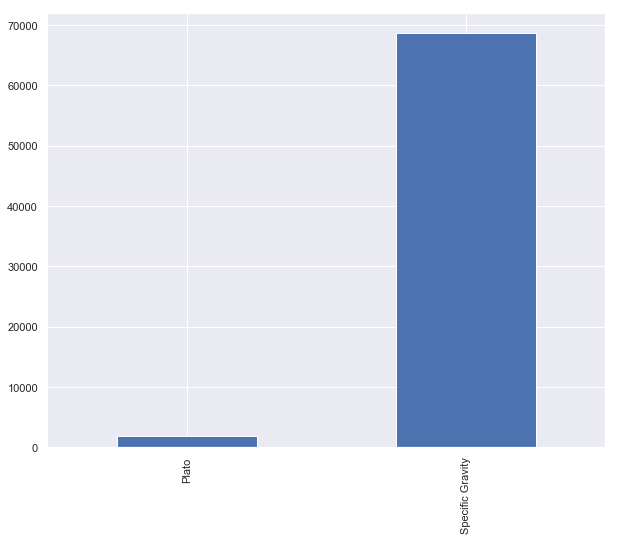

In [11]:
counts_plot('SugarScale')

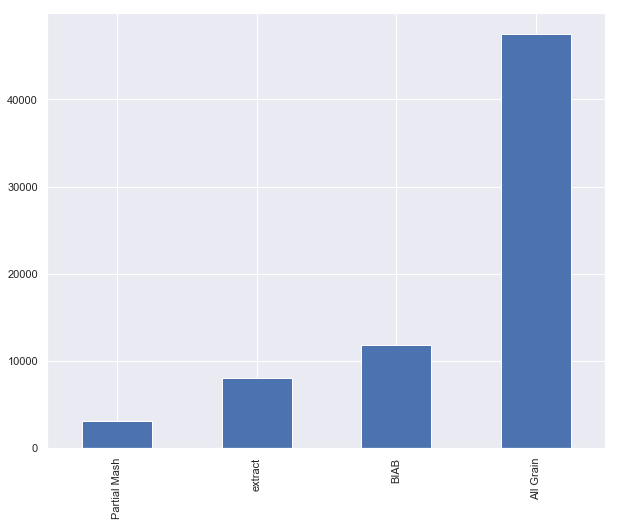

In [12]:
counts_plot('BrewMethod')

In [13]:
# We can drop the sugar scale and brew method features because we 
# created dummy variables to use in the regression analysis.
#recipe.drop(['SugarScale','BrewMethod'],axis=1,inplace=True)

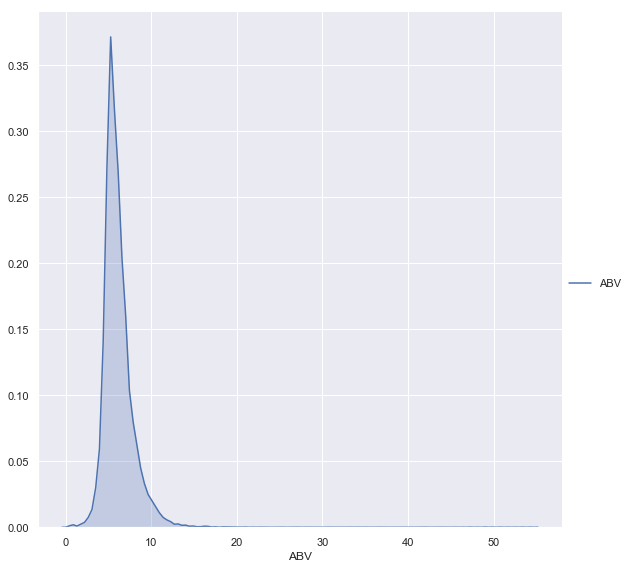

In [14]:
facet = sns.FacetGrid(recipe, aspect=1,height=8)
facet.map(sns.kdeplot, 'ABV', shade= True)
#facet.set(xlim=(xmin, xmax))
facet.add_legend()
plt.show();

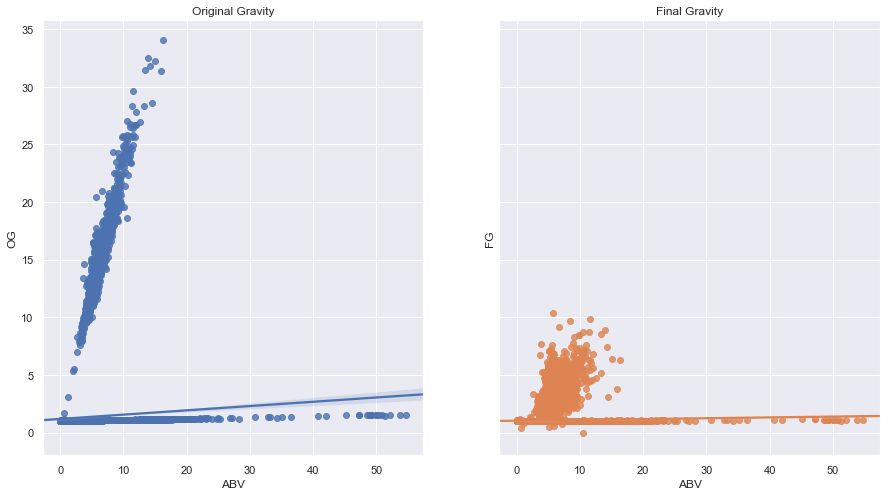

In [15]:
def plot_og_fg(data,feature1,feature2):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,8), sharey=True)
    sns.regplot(x="ABV", y=feature1, ax=ax1, data=data);
    sns.regplot(x="ABV", y=feature2, ax=ax2, data=data);
    ax1.set_title('Original Gravity');
    ax2.set_title('Final Gravity');

plot_og_fg(recipe,'OG','FG')

There seems to be two seperate relationships in the `Original Gravity` and `Final Gravity` measurements. If we look back at the beginning, we see that there are two seperate types of sugar scale measurements. Which, it turns out are two completely different ways of measuring the specific gravity of a liquid.

We can convert the plato measurement to the more common specific gravity measuremnt and see if there is any clear relationships. We'll do this for the `Og`, `Fg` and `BoilGravity`.


In [16]:
# Conversion between plato measureent and specific gravity
# https://www.brewersfriend.com/plato-to-sg-conversion-chart/
def get_sg_from_plato(plato):
    return 1 + (plato / (258.6 - ( (plato/258.2) *227.1) ) )


In [17]:
# Convert the OG, FG and boil gravity measurments to the standard specific gravity units
recipe['OG_sg'] = recipe.apply(lambda row: get_sg_from_plato(row['OG']) \
                               if row['SugarScale'] == 'Plato' else row['OG'], axis=1)
recipe['FG_sg'] = recipe.apply(lambda row: get_sg_from_plato(row['FG']) \
                               if row['SugarScale'] == 'Plato' else row['FG'], axis=1)
recipe['BoilGravity_sg'] = recipe.apply(lambda row: get_sg_from_plato(row['BoilGravity']) \
                                        if row['SugarScale'] == 'Plato' else row['BoilGravity'], axis=1)

In [18]:
#recipe.columns
drop_features = ['OG', 'FG', 'BoilGravity', 'SugarScale', 'BrewMethod', 
                 'Style', 'SugarScale_Plato', 'SugarScale_Specific Gravity']
        
recipe.drop(drop_features,axis=1,inplace=True)

In [19]:
# The Original Gravity should not be more than 2, these are likely to be 
# typos or miss understanding the measurements.
#recipe = recipe[recipe['OG'] < 2]
#recipe = recipe[recipe['FG'] > 0.5]
#recipe = recipe[recipe['IBU'] < 1000]

In [20]:
def plot_feature_ABV(data,feature):
    sns.lmplot(x="ABV", y=feature, data=data, height=6);
    

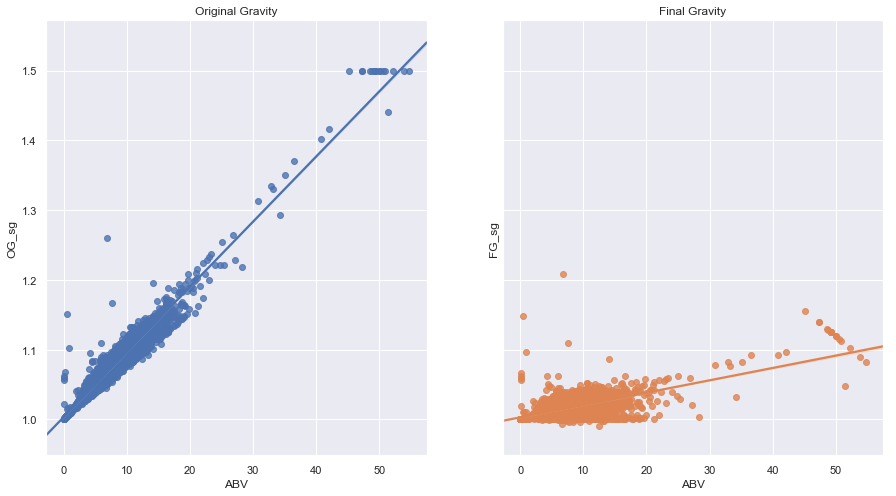

In [21]:

plot_og_fg(recipe,'OG_sg','FG_sg')

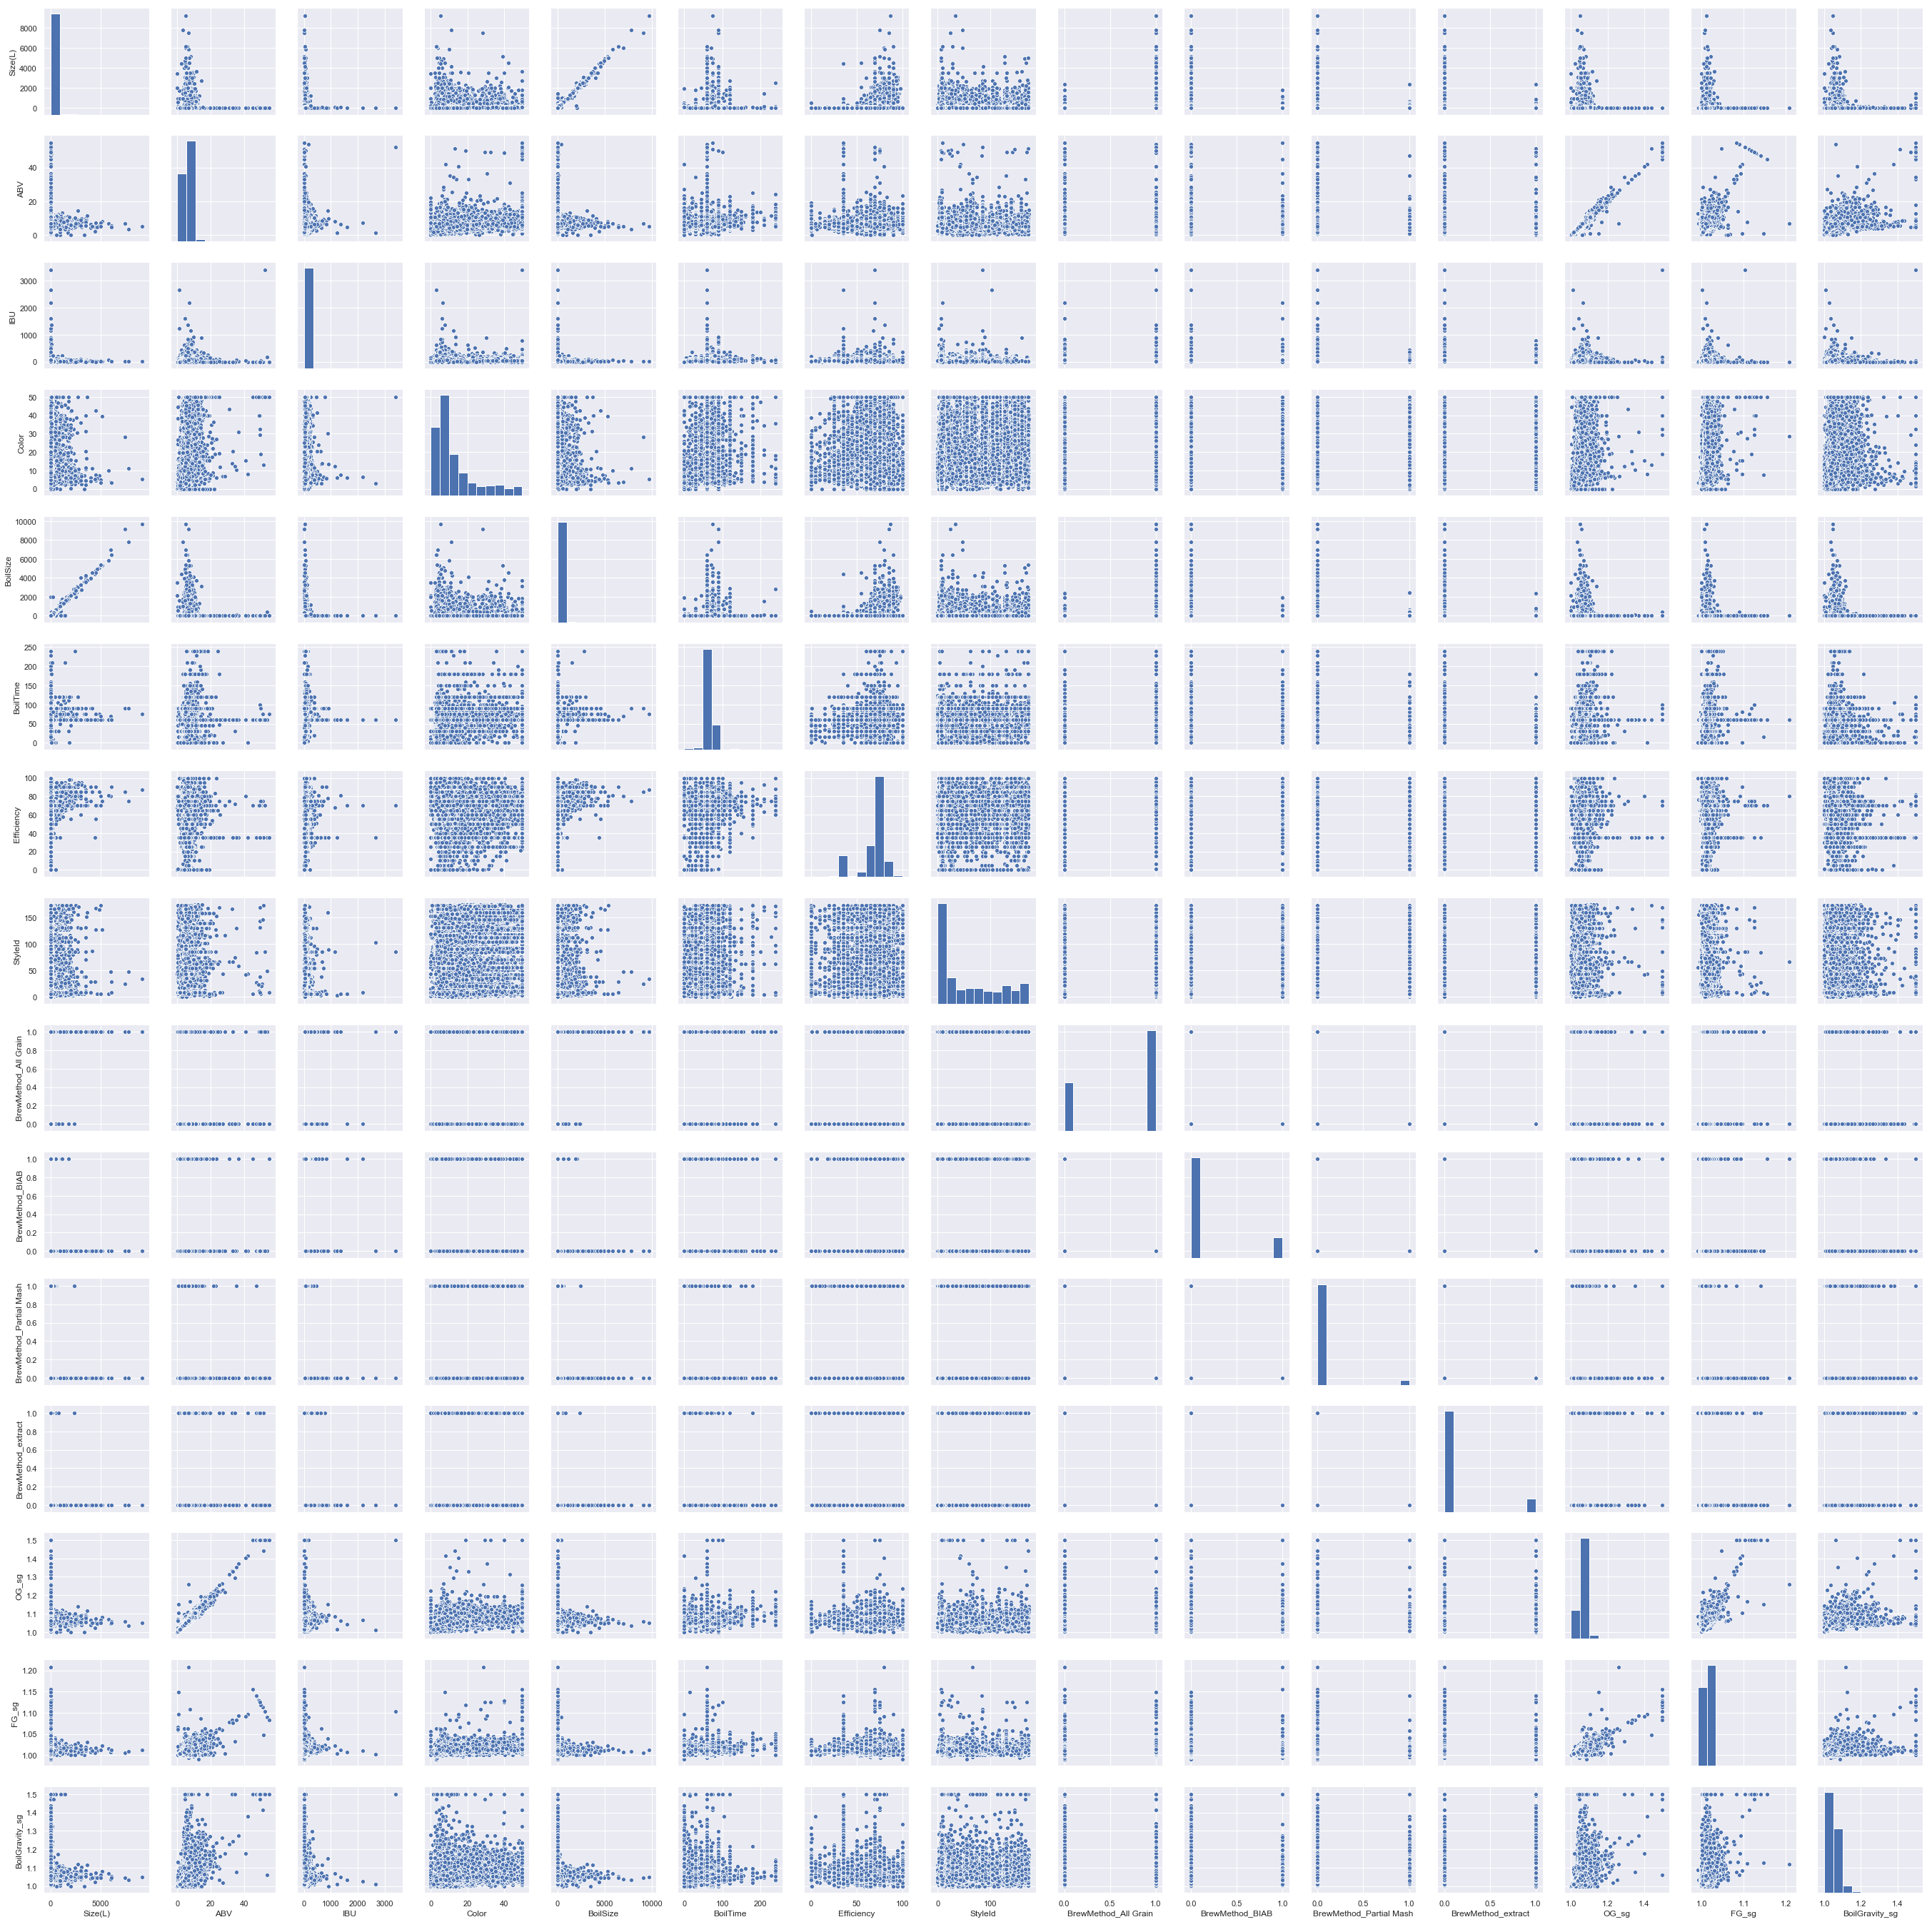

In [22]:
#numeric_data = data.select_dtypes(include=[np.number])
sns.pairplot(recipe);
plt.show()

## Create The Regression Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [24]:
feature_list = ['StyleId', 'Size(L)', 'BoilSize', 'BoilTime', 'Efficiency', 
                'BrewMethod_All Grain', 'BrewMethod_BIAB','BrewMethod_Partial Mash', 'BrewMethod_extract', 
                'IBU', 'Color',  'BoilGravity_sg']#'OG_sg', 'FG_sg',

X = recipe[feature_list]
y = recipe['ABV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    

In [25]:

def retrain_model(X_train, X_test, y_train, y_test):
    
    model = LinearRegression();
    fit = model.fit(X_train, y_train)
    
    print ('training score: ',model.score(X_train, y_train))
    print ('testing score: ',model.score(X_test, y_test))
    
    return model


In [26]:
model = retrain_model(X_train, X_test, y_train, y_test)

training score:  0.42150056213339615
testing score:  0.4585409015413079


### Feature Importance

In [27]:
feature_importance = pd.DataFrame(data=model.coef_,index=X.columns)


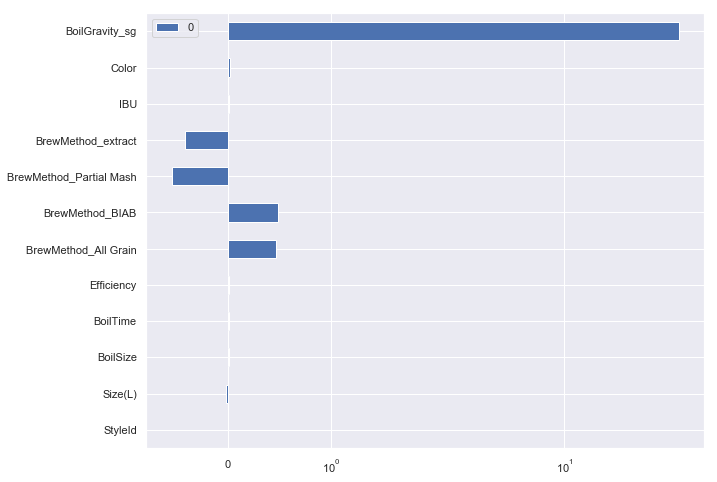

In [28]:

def plot_feature_importance(data,xscale=None):
    ax = data.plot(kind='barh',figsize=(10,8))
    if xscale is not None:
        ax.set_xscale(xscale)

plot_feature_importance(feature_importance,'symlog')

Its obvious that `FG_sg` and `OG_sg` are really important features. The remainig feature coefficients are too small to see. I also found that `BoilGravity_sg` is also an important feature, but what about the rest?

In [29]:
# Remove the features with large coefficients
feature_importance.drop(['OG_sg','FG_sg'], axis=0, inplace=True)


KeyError: "['OG_sg' 'FG_sg'] not found in axis"

In [ ]:

plot_feature_importance(feature_importance,'symlog')

In [ ]:
feature_importance.drop(['BoilGravity_sg'], axis=0, inplace=True)


In [ ]:
plot_feature_importance(feature_importance,'symlog')

### Forward Feature Collection

In [ ]:
def adjusted_R(r_squared,n,k):
    return 1 - ((1-r_squared)*(n-1))/(n-k-1)


In [ ]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

r2_list = []
adjusted_r2_list = []

In [ ]:



while True:
    changed = False
    
    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    # for each remaining feature to be evaluated
    for new_column in excluded:
       
        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2_list.append(model.score(X_test[included + [new_column]], y_test))
        # number of predictors in this model
        k = len(included + [new_column]) + 1
        # calculate the adjusted R^2
        adjusted_r2_list.append(adjusted_R(r2_list[-1],n,k))

        # if model improves
        if adjusted_r2_list[-1] > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2_list[-1], 'a_r2': adjusted_r2_list[-1]}
            # flag that found a better model
            changed = True
            

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        print (included)
        # terminate if no better model
        break


Looking at the feature coefficients suggests that `FG_sg`, `OG_sg` and `BoilGravity_sg` are the important features, but using forward feature selection suggests that `BoilTime` and `StyleId` are also important.